In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
df = pd.read_csv('insurance.csv')

In [182]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [183]:
df.shape

(1338, 7)

In [184]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [186]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


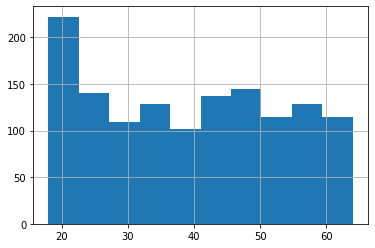

In [187]:
df['age'].hist(bins=10)

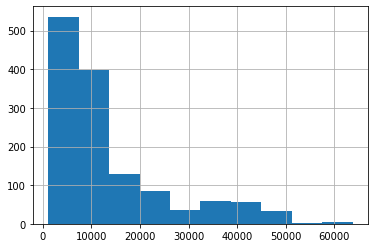

In [188]:
df['charges'].hist(bins=10)

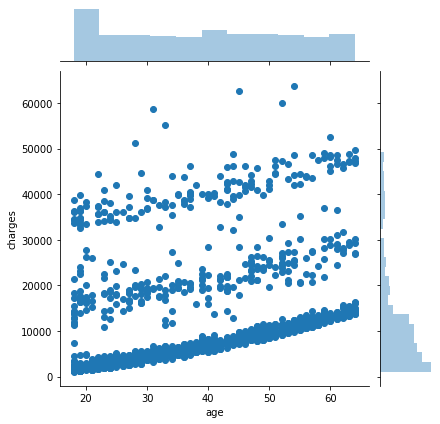

In [189]:
sns.jointplot('age','charges',data=df)

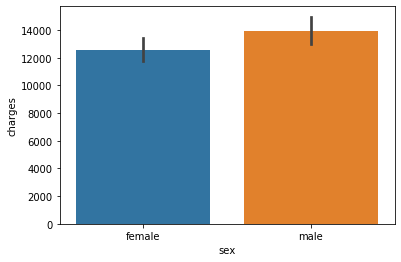

In [190]:
sns.barplot('sex','charges',data=df)

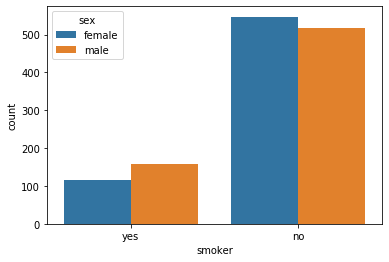

In [191]:
sns.countplot('smoker',data=df,hue='sex')

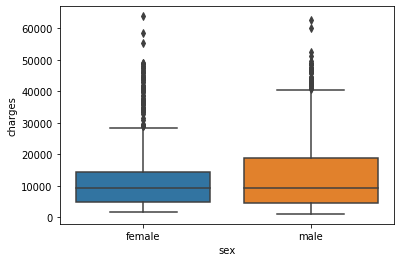

In [192]:
sns.boxplot(x='sex',y='charges',data=df)

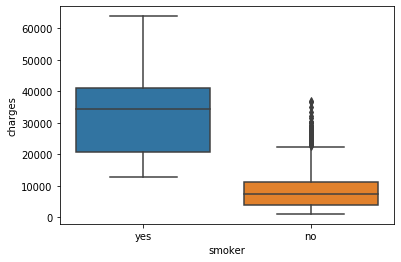

In [193]:
sns.boxplot(x='smoker',y='charges',data=df)

In [194]:
cor = df.corr()

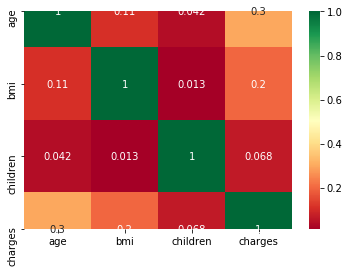

In [195]:
top_corr_features = cor.index
#plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

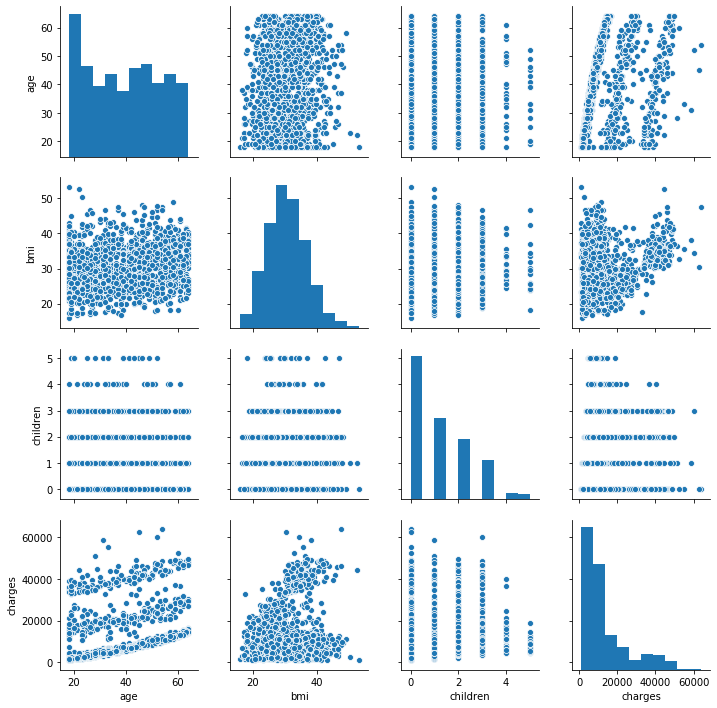

In [196]:
sns.pairplot(df)

In [197]:
dum1 = pd.get_dummies(df['sex'],drop_first=True)

In [198]:
df.drop('sex',inplace=True,axis=1)

In [199]:
df.head(5)

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520


In [200]:
df = pd.concat([df,dum1],axis=1)

In [201]:
df.head(5)

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [202]:
dum2 = pd.get_dummies(df['smoker'],drop_first=True)

In [203]:
df.drop('smoker',axis=1,inplace=True)

In [204]:
df = pd.concat([df,dum2],axis=1)

In [205]:
df.head(5)

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [206]:
df.rename(columns={'yes':'smoker'},inplace=True)

In [207]:
dum3 = pd.get_dummies(df['region'],drop_first=True)

In [208]:
df.drop('region',axis=1,inplace=True)
df=pd.concat([df,dum3],axis=1)

In [209]:
df.head(5)

,age,bmi,children,charges,male,smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


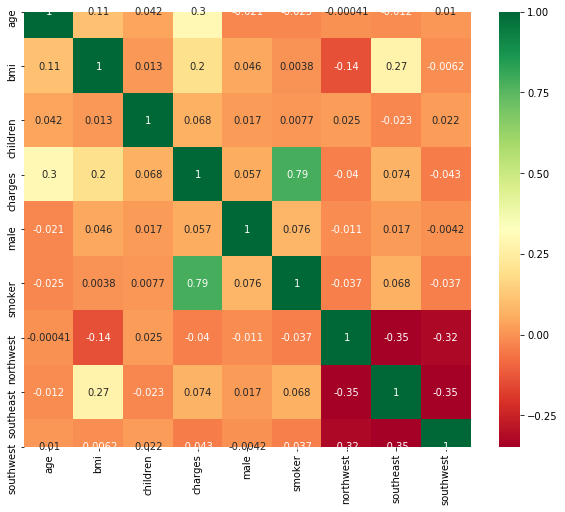

In [210]:
cor = df.corr()
top_corr_features = cor.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [211]:
df.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
male         0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [212]:
from sklearn.model_selection import train_test_split

In [229]:
X = df.drop(['charges','southwest','northwest','southeast'],axis=1)
y = df['charges']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
lin = LinearRegression()

In [233]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
print(lin.intercept_)

-12504.258025697372


In [235]:
print(lin.coef_)

[  262.35104943   331.64087047   377.66377381   146.5321422
 23693.21588352]


In [236]:
cdf = pd.DataFrame(lin.coef_, index=X.columns ,columns = ['Coeff'])

In [237]:
cdf

,Coeff
age,262.351049
bmi,331.640870
children,377.663774
male,146.532142
smoker,23693.215884


In [238]:
pred = lin.predict(X_test)

In [239]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [240]:
r = sm.add_constant(X_train)
est = sm.OLS(y_train,r)
est2= est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     519.4
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          5.43e-261
Time:                        21:35:17   Log-Likelihood:                -9083.1
No. Observations:                 896   AIC:                         1.818e+04
Df Residuals:                     890   BIC:                         1.821e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.25e+04   1194.741    -10.466      0.0

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [241]:
print(lin.score(X_test,y_test))

0.7587422388407032


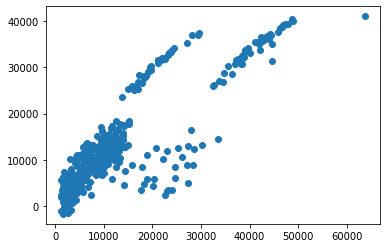

In [226]:
plt.scatter(y_test,pred)

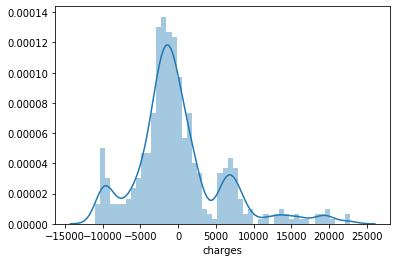

In [227]:
sns.distplot((y_test-pred),bins=50);